In [1]:
import seaborn as sns

In [2]:
from datasets import load_dataset
import pandas as pd

dataset = load_dataset("toughdata/quora-question-answer-dataset")
df = pd.DataFrame.from_dict(dataset["train"])

c:\Users\Karan\anaconda3\envs\lora2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from nltk import word_tokenize
from nltk.corpus import stopwords
import string

stopwords = set(stopwords.words('english'))

def clean(text):
    text = word_tokenize(text)
    text = [word.lower() for word in text if word.isalpha()]
    punct = str.maketrans('','',string.punctuation)
    text = [word.translate(punct) for word in text]
    text = [word for word in text if not word in stopwords]
    return text

df['answer'] = df['answer'].apply(clean)

In [4]:
from collections import Counter

def counter(text):
    cnt = Counter()
    for msgs in text:
        for msg in msgs:
            cnt[msg] +=1
    return cnt

text_cnt = counter(df['answer'])

<Axes: xlabel='Counts', ylabel='Words'>

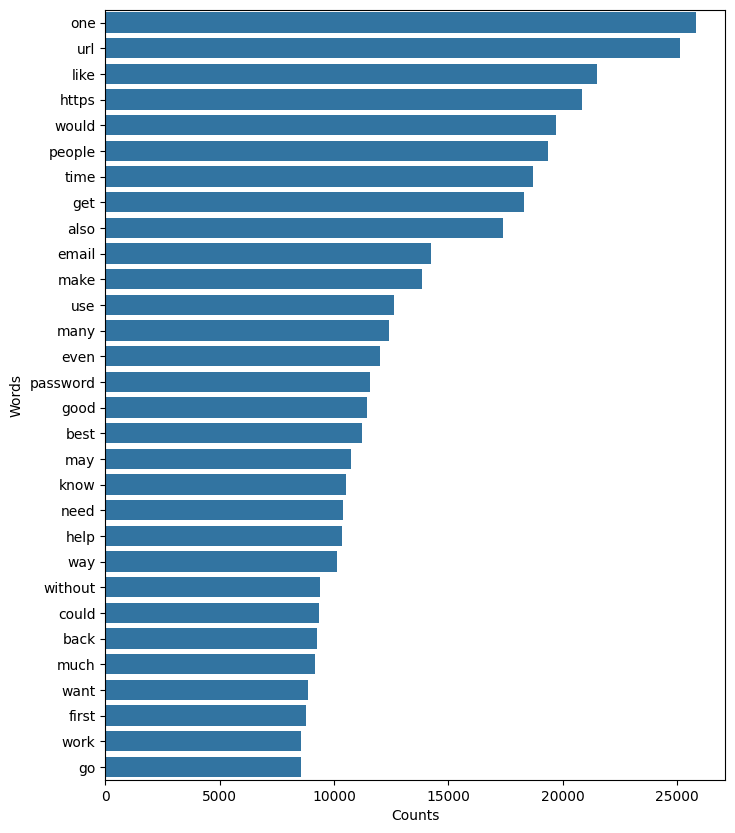

In [5]:
import matplotlib.pyplot as plt

commonw = text_cnt.most_common(30)
commonw = pd.DataFrame(commonw, columns = ['Words', 'Counts'])
plt.figure(figsize=(8,10))
sns.barplot(y="Words",x="Counts", data= commonw)